In [1]:
#Differences between this and other sets: 
#I tried to remove the source info from the sets so that this model will be usable in a chrome extension that will check text highlighted by the user
#While the accuracy score is lower than other models, it still has a high accuracy while only reading the text value with excluded source identifying info (twitter/reuters)

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [3]:
#Load True Articles and Apply true label, remove Reuters header
trueDF = pd.read_csv('/Users/adam/Main/HackAI/True.csv')
trueDF['label'] = 'REAL'
#Common prefixes
twitterParse = '@realdonaldtrump : - '
reutersParse = "(reuters) - "
#Remove prefixes
#for index, row in trueDF.iterrows():
#    text = row['text'].lower()
 #   if reutersParse in text:
 #       text = text[text.index(reutersParse)+len(reutersParse):]
 #   elif twitterParse in text:
 #       #row['text'] = text[text.index(twitterParse)+len(twitterParse):]
 #       trueDF.drop(index)
 #   row['text'] = text
trueDF.shape
trueDF.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",REAL
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",REAL
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",REAL
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",REAL
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",REAL


In [4]:
#Load Fake Articles and Apply fake label
falseDF = pd.read_csv('/Users/adam/Main/HackAI/Fake.csv')
falseDF['label'] = 'FAKE'
falseDF.shape
falseDF.head(10)
for index, row in trueDF.iterrows():
    row['text'] = row['text'].lower()

In [5]:
#compile information
testDF = pd.concat([trueDF, falseDF])
df = testDF.sample(frac = 1)
df.shape
df.head()

,title,text,subject,date,label
14891,Arab countries in row with Qatar are not inter...,doha (reuters) - qatar s emir sheikh tamim bin...,worldnews,"November 14, 2017",REAL
154,Former Ambassador Accuses Trump Of Violating ...,While the Trump administration is still reelin...,News,"November 1, 2017",FAKE
855,Homophobic Kansas Lawmaker Gleefully Harasses...,We all know that the GOP is the party of anti-...,News,"July 14, 2017",FAKE
2097,As Trump Takes 6th Golf Trip As President The...,Trump spent his the sixth weekend golfing and ...,News,"March 18, 2017",FAKE
3660,George Takei Just B*tch-Slapped Trump After H...,"If you ve been paying attention, you know that...",News,"November 27, 2016",FAKE


In [6]:
#Get labels
labels = df.label
labels.head()

14891    REAL
154      FAKE
855      FAKE
2097     FAKE
3660     FAKE
Name: label, dtype: object

In [7]:
#Split 30-70 for test-train
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.3, random_state=7)

In [8]:
#Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

In [9]:
#Initialize PA Classifier
PAC = PassiveAggressiveClassifier(max_iter=50) #initialize
PAC.fit(vec_train, y_train) #fit to x/y train sets
y_pred = PAC.predict(vec_test) #predict values from text_test files
score = accuracy_score(y_test, y_pred) #score the results
print("Accuracy Score: {0:.5%}".format(score))

Accuracy Score: 99.29473%


True Positives:  6991
False Negatives:  58
False Positives:  37
True Negatives:  6384
Accuracy Score: 99.29473%


Text(0, 0.5, 'Actual Answer')

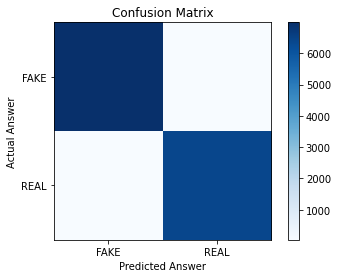

In [10]:
CM = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print('True Positives: ', CM[0][0])
print('False Negatives: ', CM[0][1])
print('False Positives: ', CM[1][0])
print('True Negatives: ', CM[1][1])
y_pred = PAC.predict(vec_test) #predict values from text_test files
score = accuracy_score(y_test, y_pred) #score the results
print("Accuracy Score: {0:.5%}".format(score))
plt.imshow(CM, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(['FAKE', 'REAL']))
plt.xticks(tick_marks, ['FAKE', 'REAL'])
plt.yticks(tick_marks, ['FAKE', 'REAL'])
plt.xlabel('Predicted Answer')
plt.ylabel('Actual Answer')

In [11]:
modelname = 'Model_pacTextOnly.pkl'
vectorname = 'Vectorizer_pacTextOnly.pkl'
pickle.dump(PAC, open(modelname, 'wb'))
pickle.dump(vectorizer, open(vectorname, 'wb'))